# Medical Insurance Cost Prediction


1. What are the primary factors influencing medical expenses?
2. How accurate are machine learning models in predicting medical expenses?
3. In what ways can machine learning models enhance the efficiency and profitability of health insurance companies?


In [61]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [62]:
df = pd.read_csv('medical_insurance.csv',sep=',')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [63]:
# renames the  column

df= df.rename(columns = {'charges':'Cost'})

In [69]:
df

,age,sex,bmi,children,smoker,region,Cost
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [64]:
#look into  the number of rows with unique values
df.value_counts()

age  sex     bmi     children  smoker  region     Cost       
52   female  30.780  1         no      northeast  10797.33620    4
25   female  42.130  1         no      southeast  3238.43570     4
19   male    30.590  0         no      northwest  1639.56310     4
             26.030  1         yes     northwest  16450.89470    4
             24.600  1         no      southwest  1837.23700     4
                                                                ..
31   male    25.900  3         yes     southwest  19199.94400    2
             20.400  0         no      southwest  3260.19900     2
     female  38.095  1         yes     northeast  58571.07448    2
             36.630  2         no      southeast  4949.75870     2
64   male    40.480  0         no      southeast  13831.11520    2
Name: count, Length: 1337, dtype: int64

In [65]:
# sumary stats of the numerical variables of the  data frame
df.describe()

,age,bmi,children,Cost
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [66]:
# look into the first 10 rows
df.iloc[:10]

,age,sex,bmi,children,smoker,region,Cost
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [67]:
# select the rows containing the northwest region
northwest_rows = df[df['region'].str.contains('northwest')]
northwest_rows

,age,sex,bmi,children,smoker,region,Cost
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
7,37,female,27.740,3,no,northwest,7281.50560
9,60,female,25.840,0,no,northwest,28923.13692
24,37,male,28.025,2,no,northwest,6203.90175
...,...,...,...,...,...,...,...
2756,39,female,24.225,5,no,northwest,8965.79575
2761,54,female,35.815,3,no,northwest,12495.29085
2762,21,female,32.680,2,no,northwest,26018.95052
2769,19,male,26.030,1,yes,northwest,16450.89470


In [70]:
import  matplotlib.pyplot as plt

In [71]:
import plotly.express as px


In [72]:
# check the correlation between body mass and age and if sex has an impact on it

pots = px.scatter( df, y = "bmi" , x = "age", facet_col=("region"), color = 'sex', title = "Relations between Sex,  Age and BMI")
pots.show()

In [73]:
pl = px.scatter(df,  y = 'Cost', x = "age", color= 'sex', title='Cost', facet_col = 'region')
pl.show()

In [74]:
import numpy as np


In [75]:
data = df.values
data

array([[19, 'female', 27.9, ..., 'yes', 'southwest', 16884.924],
       [18, 'male', 33.77, ..., 'no', 'southeast', 1725.5523],
       [28, 'male', 33.0, ..., 'no', 'southeast', 4449.462],
       ...,
       [19, 'male', 26.03, ..., 'yes', 'northwest', 16450.8947],
       [23, 'male', 18.715, ..., 'no', 'northwest', 21595.38229],
       [54, 'male', 31.6, ..., 'no', 'southwest', 9850.432]], dtype=object)

In [76]:
from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()

# Specify columns to encode
columns_to_encode = ['region', 'sex', 'smoker']

# Apply LabelEncoder to each specified column
for col in columns_to_encode:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

df.head()


,age,sex,bmi,children,smoker,region,Cost
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


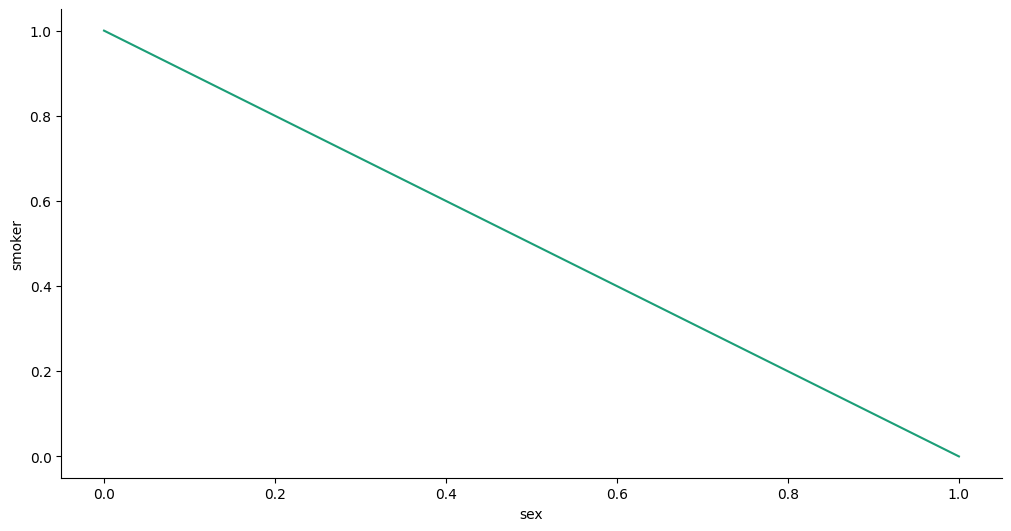

In [77]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sex']
  ys = series['smoker']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('sex', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sex')
_ = plt.ylabel('smoker')

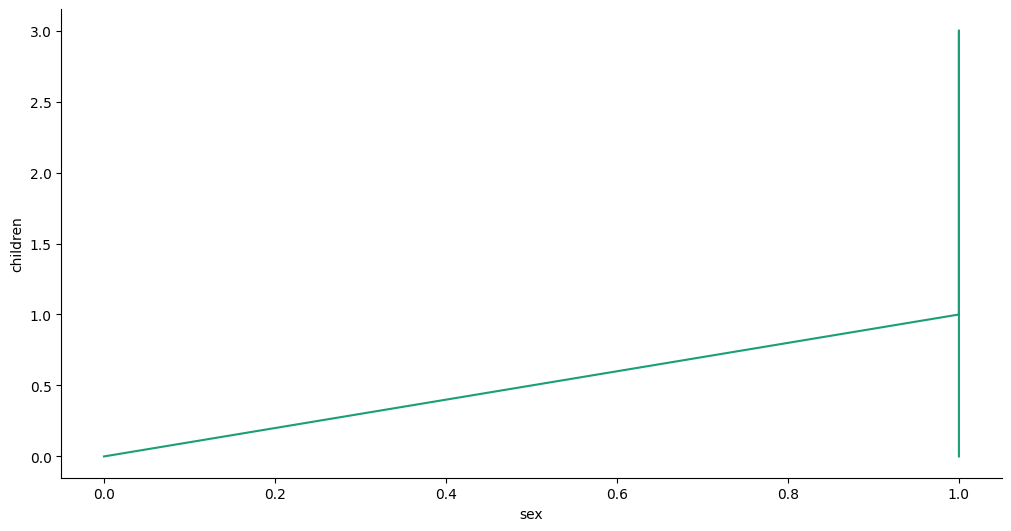

In [78]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sex']
  ys = series['children']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('sex', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sex')
_ = plt.ylabel('children')

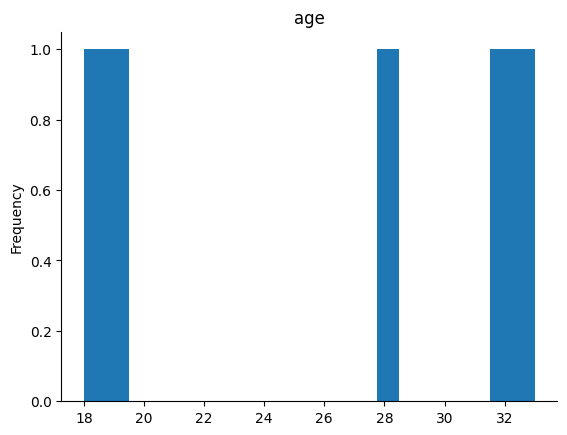

In [79]:
from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [80]:
clm = np.mean(df, axis=0)


data_transpose = np.transpose(df)
matrix_product = np.dot(df, data_transpose)



print(data_transpose, matrix_product)




               0          1         2            3          4          5     \
age          19.000    18.0000    28.000     33.00000    32.0000    31.0000   
sex           0.000     1.0000     1.000      1.00000     1.0000     0.0000   
bmi          27.900    33.7700    33.000     22.70500    28.8800    25.7400   
children      0.000     1.0000     3.000      0.00000     0.0000     0.0000   
smoker        1.000     0.0000     0.000      0.00000     0.0000     0.0000   
region        3.000     2.0000     2.000      1.00000     1.0000     2.0000   
Cost      16884.924  1725.5523  4449.462  21984.47061  3866.8552  3756.6216   

               6          7          8            9     ...         2762  \
age         46.0000    37.0000    37.0000     60.00000  ...     21.00000   
sex          0.0000     0.0000     1.0000      0.00000  ...      0.00000   
bmi         33.4400    27.7400    29.8300     25.84000  ...     32.68000   
children     1.0000     3.0000     2.0000      0.00000  ...    

In [81]:
model = smf.glm(formula = "Cost ~ age + region + bmi + children + smoker",
                data = df,
                family = sm.families.Binomial())
glm1 = model.fit()
print(glm1.summary())

print( glm1.predict())
#predictions

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Cost   No. Observations:                 2772
Model:                            GLM   Df Residuals:                     2766
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Wed, 03 Apr 2024   Deviance:                   3.3789e+09
Time:                        17:48:14   Pearson chi2:                 4.04e+27
No. Iterations:                     2   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.775e+19   7.25e+06  -1.07e+13      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1057: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



In [87]:
from sklearn.model_selection import train_test_split


X = df.drop(columns = ['Cost'])
Y = df['Cost']

# Splitting the dataset into 80% training data and 20% testing data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=1)


In [89]:
import xgboost as xgb

# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, Y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, Y_test, enable_categorical=True)





In [91]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Train XGBoost model
params = {
    'objective': 'reg:squarederror',  # Specify the objective for regression
    'eval_metric': 'rmse'  # Specify the evaluation metric as root mean squared error
}
num_rounds = 100  # Number of boosting rounds

# Train the model
xgb_model = xgb.train(params, dtrain_reg, num_rounds)

# Make predictions on the testing data
y_pred = xgb_model.predict(dtest_reg)

# Evaluate the model
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 9585292.510663938
R-squared (R^2): 0.9272664085826366
Mean Absolute Error (MAE): 1338.662501476661


In [82]:
from sklearn.model_selection import train_test_split


X = df.drop(columns = ['Cost'])
Y = df['Cost']

# Splitting the dataset into 80% training data and 20% testing data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=0)






In [85]:
#Building the KNN Model on our dataset
from sklearn.neighbors import KNeighborsRegressor
KNN_model = KNeighborsRegressor(n_neighbors=3).fit(X_train,Y_train)
KNN_predict = KNN_model.predict(X_test) #Predictions on Testing data
print(KNN_predict)

[ 1991.98581667 15321.98557667  4934.64555    12451.254
 17324.73700667 13382.50905     4807.26483333  3909.2806
  6042.10366667  2229.65728333 13055.54566667  7806.8468
  2334.18236667  5575.1435     15344.08891    22809.75866667
 14979.82610333  9195.86296667 15378.09798    13697.15913333
 14880.07952     1633.656      46867.3656      1958.5237
 17388.20336333 10483.10546667 10760.97721667 15471.52768
 17001.31666667 24210.26289667 19020.58036667  5190.83273333
 16334.08596     2121.8155      1621.98463333 24052.37706667
  9061.17875    20294.01663333 22809.75866667 23953.56401333
  8418.7358      1711.0268      3493.50476667  9251.5549
  5700.99706667 19191.79346667  7508.67716667  6542.50936667
  6751.66778333  6780.78550333 33544.68396667  1704.96425
  1789.6471      1788.09133333  7451.91593333 35222.09309333
 13720.02829333 30893.3717      3113.63533333 14026.83693333
 24416.99690667 15938.1676      2497.9557     11634.63801667
  8495.08756667 11897.89206667  7378.69533333 19596

In [86]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming you have the actual target values (Y_test) and the predicted values (DT_predict)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, KNN_predict)

# Calculate R-squared (R^2)
r_squared = r2_score(Y_test, KNN_predict)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, KNN_predict)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r_squared)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 75380937.91964066
R-squared (R^2): 0.4941901041169743
Mean Absolute Error (MAE): 4840.409917800601


In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train,Y_train)
DT_predict = DT_model.predict(X_test) #Predictions on Testing data
print(DT_predict)

In [84]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming you have the actual target values (Y_test) and the predicted values (DT_predict)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, DT_predict)

# Calculate R-squared (R^2)
r_squared = r2_score(Y_test, DT_predict)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, DT_predict)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r_squared)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 20079225.691183835
R-squared (R^2): 0.8652673827553526
Mean Absolute Error (MAE): 2507.6212876795466


The key determinants affecting medical expenses include age, region, body mass index (BMI), number of children, and smoking status, all with p-values of 0.00, indicating a robust correlation with the cost of medical treatments.

Further analysis of the dataset involved computing three key metrics and two models (Decision Trees and Xgboost:

**Decision Trees**

Mean Squared Error (MSE) : 20,079,225.69

R-squared (R^2): 0.865

Mean Absolute Error (MAE) : 2,507.62


**Xgboost**

Mean Squared Error (MSE): 9585292.510663938



R-squared (R^2): 0.9272664085826366


Mean Absolute Error (MAE): 1338.662501476661


The XGBoost model demonstrates superior accuracy, achieving an impressive R-squared value of 92.7% with lower MSE and MAE.

These metrics provide insights into the accuracy and explanatory power of our model in predicting medical expenses.



How accurate are machine learning models in predicting medical expenses?

The accuracy of predicting medical expenses can vary based on several factors. In our assessment, we compared two models, both of which produced similar results. However, one model showed superior accuracy compared to the other. Despite their differences, both models delivered accurate predictions for medical expenses.



In what ways can machine learning models enhance the efficiency and profitability of health insurance companies?


Machine learning offers health insurance companies transformative opportunities to enhance their operations and maximize profitability. By leveraging advanced algorithms, insurers can identify high-risk individuals and tailor proactive health management programs to mitigate future healthcare costs while promoting the well-being of policyholders. Additionally, machine learning enables insurers to optimize pricing strategies by analyzing market trends, competitor actions, and customer preferences. This data-driven approach ensures that insurance premiums and product offerings remain competitive while maximizing profitability. Together, these capabilities empower insurers to deliver superior value to their customers while driving sustainable growth in the dynamic healthcare landscape.





